# Setting Everything Up

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer
import json
from flatten_json import flatten


# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

# pd.options.display.float_format = '{:,.0f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin

In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)


R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
%%R
library(vistime)
library(shiny)
library(plotly)
library(ggrepel)
#for timeline plotting

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout




In [11]:
from collections import Counter


# Reading the data

In [12]:
df_kenya_education=pd.read_csv("df_edu_no_total_updated.csv")
df_kenya_education

,Unnamed: 0.2,County,equitable_share_2020_21,equitable_share_2021_22_plus,conditional_grant_2020_21,conditional_grant_2021_22_plus,annual_own_source_revenue_2020_21,annual_own_source_revenue_2021_22_plus,total_revenue_2020_21,total_revenue_2021_22_plus,number_x,county,number_of_schools,total_enrolment,average_school_size,place,population,land_area_km_sq,pop_density_per_km_sq,county_ptr,public_enrolment,public_teachers,public_PTR,private_enrolment,private_teachers,private_PTR,overall_public_plus_private_enrolment,public_over_overall_enrolment_as_pct,overall_pri_ptr_county,overall_pri_ptr_enrolment,overall_pri_ptr_teachers,overall_pri_ptr_PTR,txtbk_no,txtbk_county,txtbk_grade_1,txtbk_grade_2,txtbk_grade_3,pupil_textbook_ratio,s_number_elec,county_elec,national_grid,solar,no_power,elec_table_total,no_power_pct,with_power_pct,with_national_grid_pct,complete_dig_SN,complete_dig_county,number_of_pri_schools_by_2016,number_of_schools_w_complete_digital_devices,pct_installed,detailed_digi_SN,detailed_digi_county,installed_learner_digi_devices,installed_learner_digi_devices.1,Installed_digi_content_server_and_wireless_routers,installed_projectors,installed_special_needs_edu_devices,nasmla_number,nasmla_county,mathematics_mean,mathematics_SE,english_mean,english_SE,kiswahili_mean,kiswahili_SE,county_lower,Unnamed: 0.1,name,capital,code,sub_counties,sub_counties_lower,Place_county_or_subcounty,total_and_gender,number_y,dont_know_number,dont_know_number_percent,not_stated_number,at_school_or_learning_institution_number,at_school_or_learning_institution_pct,after_completion_number,after_completion_pct,before_completion_number,before_completion_pct,never_been_to_school_or_learning_institution_number,never_been_to_school_or_learning_institution_pct,Unnamed: 0,male_Place_county_or_subcounty,male_total_and_gender,male_number,male_dont_know_number,male_dont_know_number_percent,male_not_stated_number,male_at_school_or_learning_institution_number,male_at_school_or_learning_institution_pct,male_after_completion_number,male_after_completion_pct,male_before_completion_number,male_before_completion_pct,male_never_been_to_school_or_learning_institution_number,male_never_been_to_school_or_learning_institution_pct,male_Place_county_or_subcounty_lower,name_lower,county_pupil_tr,pre_primary_pupil_teacher_ratio,secondary_pupil_teacher_ratio,female_Place_county_or_subcounty,female_total_and_gender,female_number,female_dont_know_number,female_dont_know_number_percent,female_not_stated_number,female_at_school_or_learning_institution_number,female_at_school_or_learning_institution_pct,female_after_completion_number,female_after_completion_pct,female_before_completion_number,female_before_completion_pct,female_never_been_to_school_or_learning_institution_number,female_never_been_to_school_or_learning_institution_pct,public_primary_enrolment_as_pct_of_overall_enrolment,never_been_to_school_over_population_pct,before_completion_over_population_pct,left_school_before_plus_after_completion,left_school_over_left_before_and_after_as_pct,after_completion_over_left_before_and_after_as_pct,never_been_to_school_over_left_before_and_after_pct,population_per_no_of_schools_over_area
0,0,Baringo,"5,095.65","6,369.39",752.87,681.62,205.2,258.55,"6,053.72","7,309.56",1,Baringo,841,"161,919",193,Baringo,"666,763","10,976.40",61,Baringo,"143,618","5,595",26,"18,301",883,21.0,"161,919",88.697435,Baringo,"161,919","6,478",25.0,1,Baringo,1.01,1.01,1.39,1.13,30,Baringo,566,183,51,800,6.375000,93.625000,70.750000,1,Baringo,635.0,633.0,99.69,1,Baringo,"19,283","1,266",633,633,29.0,1,Baringo,500.5,56.9,499.3,65.1,493.6,61.7,baringo,459.0,Baringo,Kabarnet,NaN,NaN,NaN,BARINGO,BARINGO,"609,555","6,530",1.1,44,"253,878",41.6,"124,066",20.4,"67,739",11.1,"157,298",25.8,704.0,BARINGO,Male,"306,702","3,456",1.1,18,"130,797",42.6,"64,231",20.9,"32,867",10.7,"75,333",24.6,baringo,baringo,Baringo,29.2,25.7,BARINGO,Female,"302,842","3,074",1,26.0,"123,075",40.6,"59,832",19.8,"34,871",11.5,"81,964

In [13]:
# df_data_before_ratio=pd.read_csv("df_x_y_cleaned.csv")
# df_data_before_ratio.shape

In [14]:
df_kenya_education.shape

(47, 130)

# Reading the data in R

In [15]:
%%R 

# df_kenya_education_r_incorrect_female <- read_csv('df_x_y_cleaned_with_teacher_ratio.csv', show_col_types = FALSE)
df_kenya_education_no_total_r <- read_csv('df_edu_no_total_updated.csv', show_col_types = FALSE)

New names:
• `` -> `...1`


# Begin with some plotting

# With the totals, the analysis is skewed, so I created another dataset without the totals

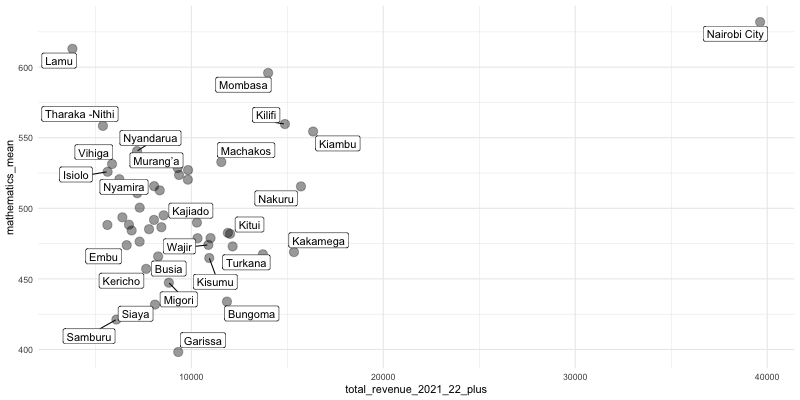

In [16]:
%%R -h 400 -w 800

ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=mathematics_mean, label = County) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


# Without the totals

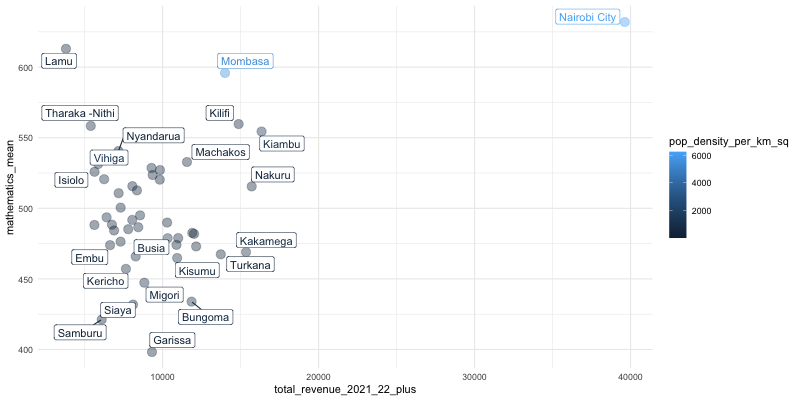

In [17]:
%%R -h 400 -w 800

ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=mathematics_mean, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


### Important: 
    1) Lamu has little revenue but does well in math, english and swahili (swahili probably partly because of Coast)
    2) Garissa does not have as low revenue as expected

# Math is the best indicator, because languages will be complicated to use as a measure of literacy
eg. Bantu speakers and Coast speakers could have an upper hand in Swahili and urban speakers could have an upper hand in both English and Swahili that is unrelated to academic standards

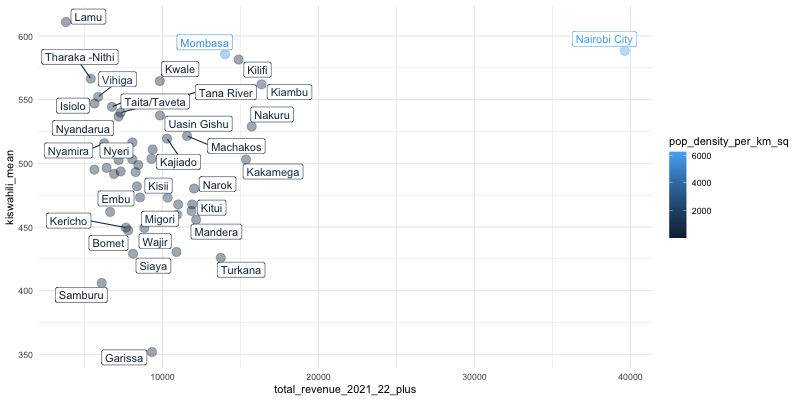

In [18]:
%%R -h 400 -w 800

#for checking english and swa use this code 
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=kiswahili_mean, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


# Checking other possible y's
>those who have never been to school <br />
>those who have dropped out <br />
>>>Check all these by gender


# For those who have never been to school

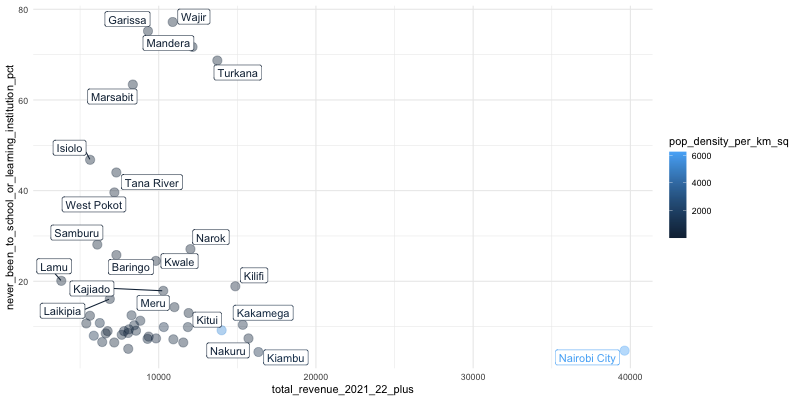

In [19]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


### Important: 
    1) Garissa, Mandera, Wajir, Marsabit and Turkana have a high rate of people who have never been to school
    2) Once again, Lamu has a low pct of people who have never been to school even though it has low revenue

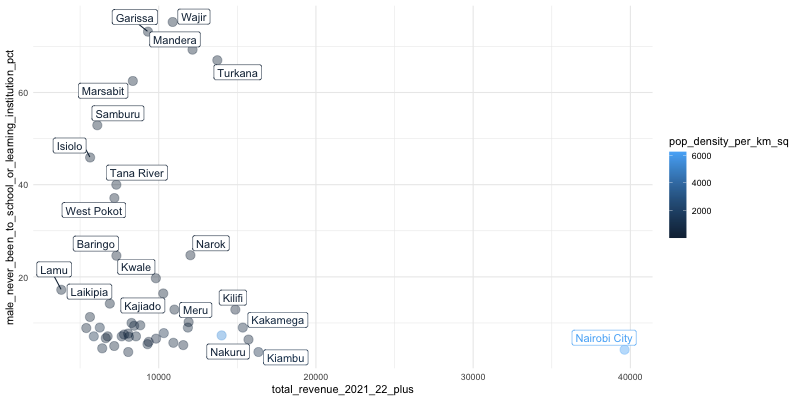

In [20]:
%%R -h 400 -w 800

#for male never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=male_never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


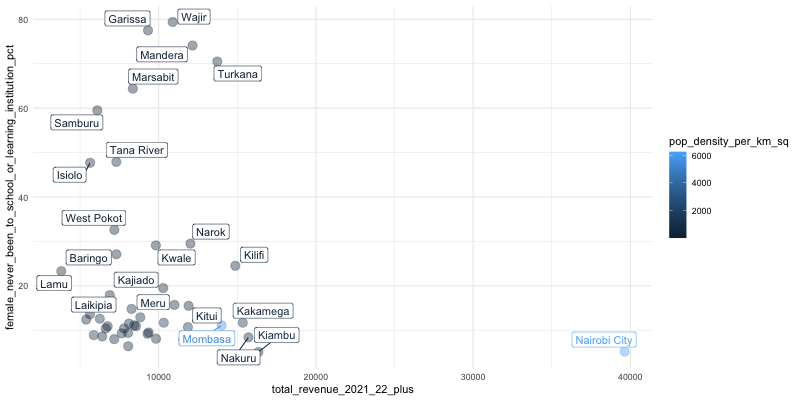

In [21]:
%%R -h 400 -w 800

#for female never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=female_never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


### Across gender, the rates are roughly the same as overall, that is:
1) Garissa, Mandera, Wajir, Marsabit and Turkana have a high rate of people who have never been to school

# I should check for gender rates just to get a general sense of trends for:
1) never been to school
2) left school before completion

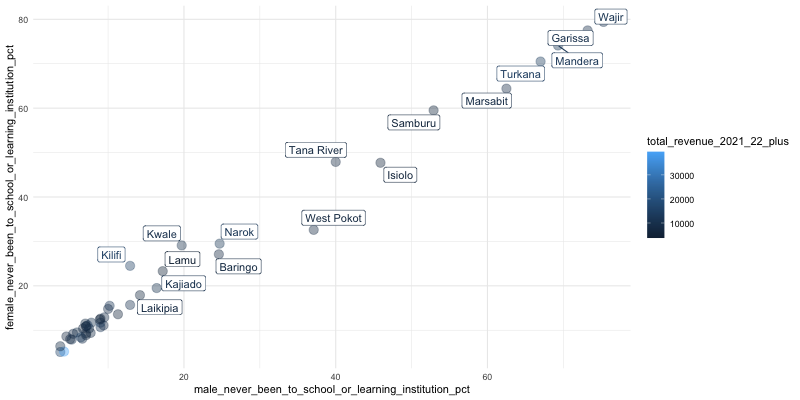

In [22]:
%%R -h 400 -w 800

#for male vs female never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=male_never_been_to_school_or_learning_institution_pct, y=female_never_been_to_school_or_learning_institution_pct, label = County, color=total_revenue_2021_22_plus) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()
#line of best fit, check which counties are outliers and should be investigated


Important:
   ## Generally just as many women as men have never been to school, 
1) Kilifi, Kwale, Tana River and Samburu are also worth keeping in mind

# For those who dropped out 

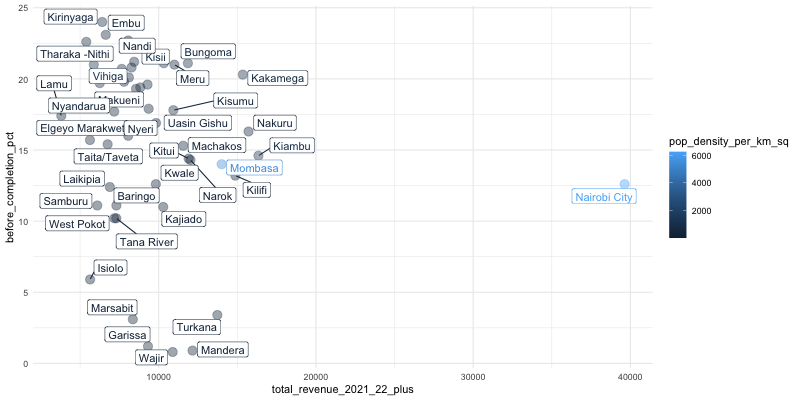

In [23]:
%%R -h 400 -w 800

#for overall people who have left school before completion
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=before_completion_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


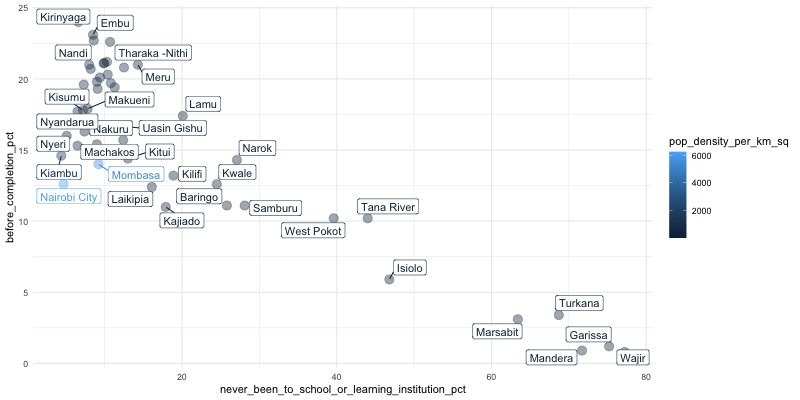

In [24]:
%%R -h 400 -w 800

#for overall people who have left school before completion
ggplot(df_kenya_education_no_total_r) +
    aes(x=never_been_to_school_or_learning_institution_pct, y=before_completion_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


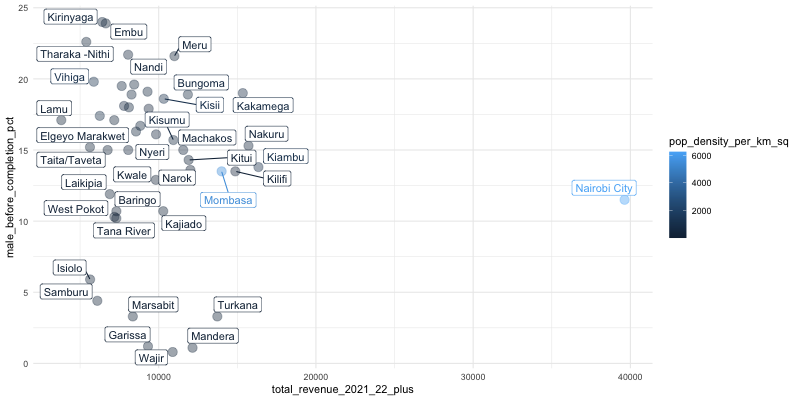

In [25]:
%%R -h 400 -w 800

#for male who have left school before completion
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=male_before_completion_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


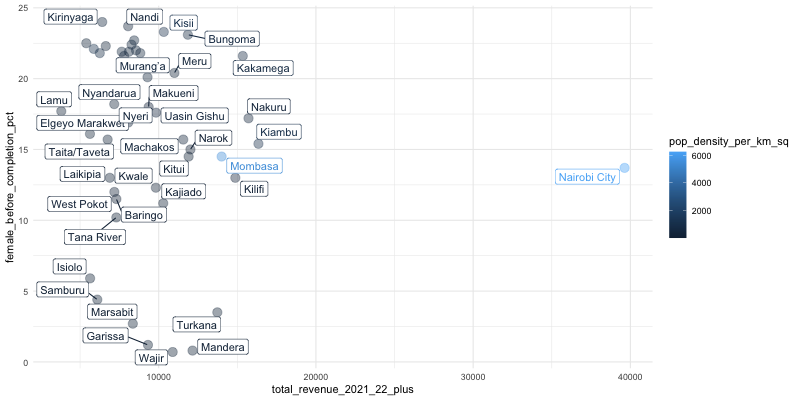

In [26]:
%%R -h 400 -w 800

#for female people who left before completion
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=female_before_completion_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


# Trends generally the same across gender, but make a scatterplot to see outliers

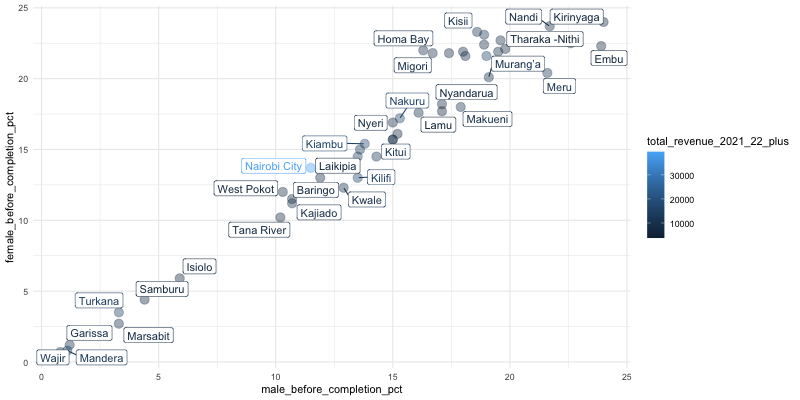

In [27]:
%%R -h 400 -w 800

#for male vs female never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=male_before_completion_pct, y=female_before_completion_pct, label = County, color=total_revenue_2021_22_plus) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

#check this clutter re dropout rates, analyse cluster at the very top
# check what the number is once normalised by only the population that attended school at all


Important:
   ## Generally just as many women as men have never been to school, 
2) Those who began school in the commonly appearing counties, that is Turkana, Garissa, Marsabit, Wajir and Mandera, less than 5% dropped out. These are counties where majority of people have never been to school but where those who have been to school barely drop out. This, however, is a mathematical question, because of course a place with low school attendance rates will have low dropout rates. Therefore, I have made a new column that runs the rates against total population. I could have done number of people who dropped out over number of people who went to school but I do not know if it would be sound to normalise never been to school against that.
3) Given Nairobi's revenue, there is a high dropout rate
4) Kirinyaga's drop out rate is high
5) Homa Bay and Migori have high female dropout rate compared to others, but the difference is not obviously significant

# Trying the population route. 
This actually presents the same problem as the initial, that is, only a small percentage of population will have dropped out if only a small percentage went to school at all. 

The solution is to find data that could give the following information: 
1) Number of people who dropped out as a percent of number of people who went to school

# Never been to school over population

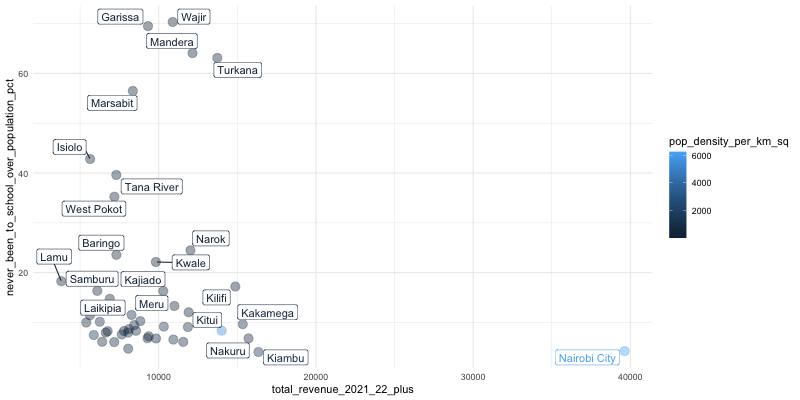

In [28]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=never_been_to_school_over_population_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

# Dropped out of school over population

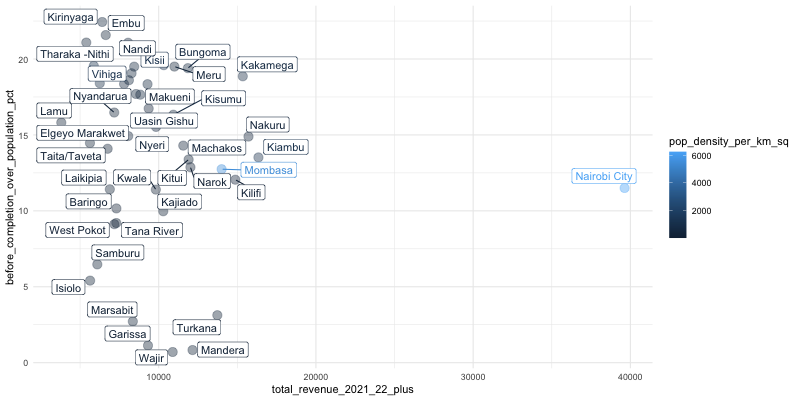

In [29]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=before_completion_over_population_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

# Trying those who left over those who left plus those who did not
1) That is, pct of people who dropped out is equal to the number of people who left school before completion as percent of  number of people who left school after completion + number who left school before completion. <br />
2) This is different from the pct initially provided in the data because it does not include number who has never been to school, removing the mathematical issue that would mean that counties with low attendance definitely also have low dropout rates. In this case, we are only taking into account those who have ever been to school. That is, among those who have gotten the opportunity to go to school at all, what is the drop out rate?

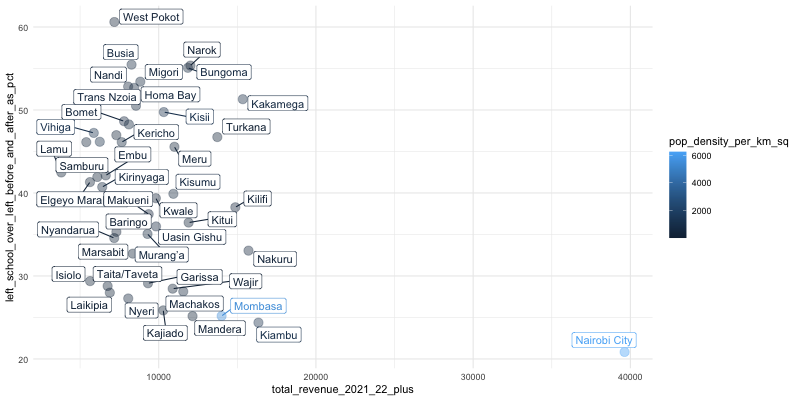

In [30]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

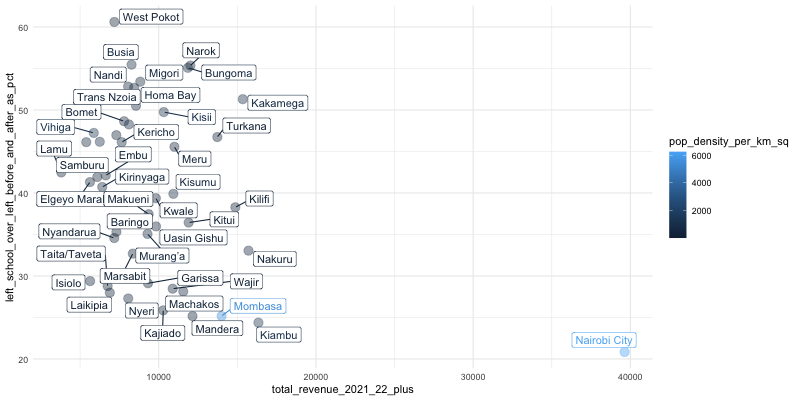

In [31]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

Important: <br />
   # On low drop out rates in areas with lower access to education
1) It appears that even after accounting for the mathematical issue raised by the raw numbers initially, the counties with typically low access to education still seem to have lower dropout rates for those who do attend school. Look at Garissa, Wajir, Mandera and Isiolo above, for instance. They have drop out rates nearly as low as Kiambu, Mombasa and Nairobi's. That is, among people who have ever been to school in those counties, people were less likely to drop out once they began school in these counties than in the counties where education may be more accessible. 
2) On the other hand, that means, people in these counties with low education access who have been to school are then more likely to finish school. I can create a column for that just to make it more visual even though it would be the exact same graphic above turned upside down



# people in these counties with low education access who have been to school are then more likely to finish school. 
I can create a column for that just to make it more visual even though it would be the exact same graphic above turned upside down

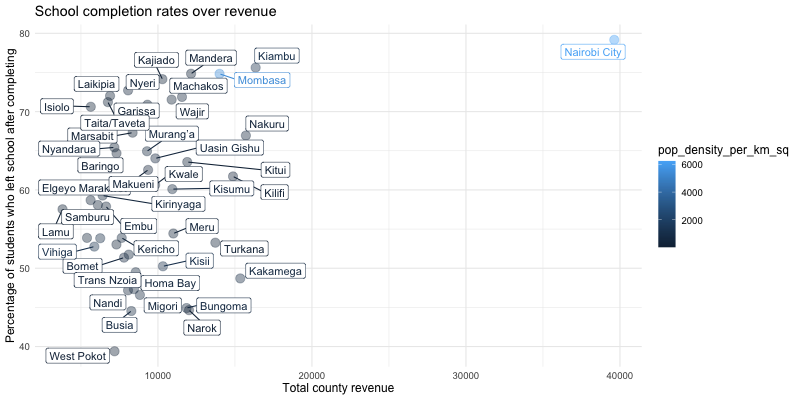

In [32]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=total_revenue_2021_22_plus, y=after_completion_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()+
    labs(
        title='School completion rates over revenue',
        )+
    theme(text=element_text(size=12))+
    ylab("Percentage of students who left school after completing") +
    xlab("Total county revenue") 

Important:
# From the above visual, it is clear that the counties of interest have high completion rates in school. 

1) To temporarily complete this analysis, I will draw a scatter plot for never been to school pct vs left school before completion, this time the left school before completion number will be over the number of people who attended school at all <br />
2) Question: To make the pcts comparable, I would need to make a pct of the never been to completion number?

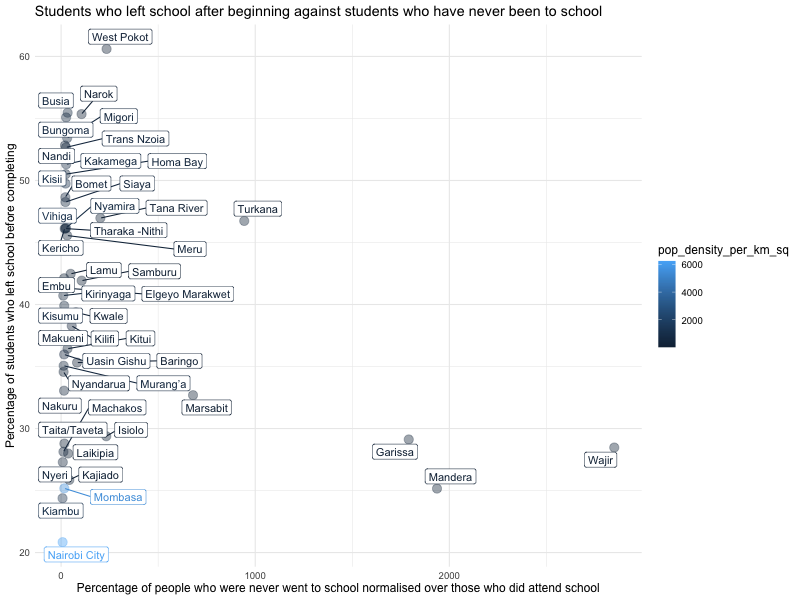

In [33]:
%%R -h 600 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=never_been_to_school_over_left_before_and_after_pct, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()+
    labs(
        title='Students who left school after beginning against students who have never been to school',
        )+
    theme(text=element_text(size=12))+
    ylab("Percentage of students who left school before completing") +
    xlab("Percentage of people who were never went to school normalised over those who did attend school") 

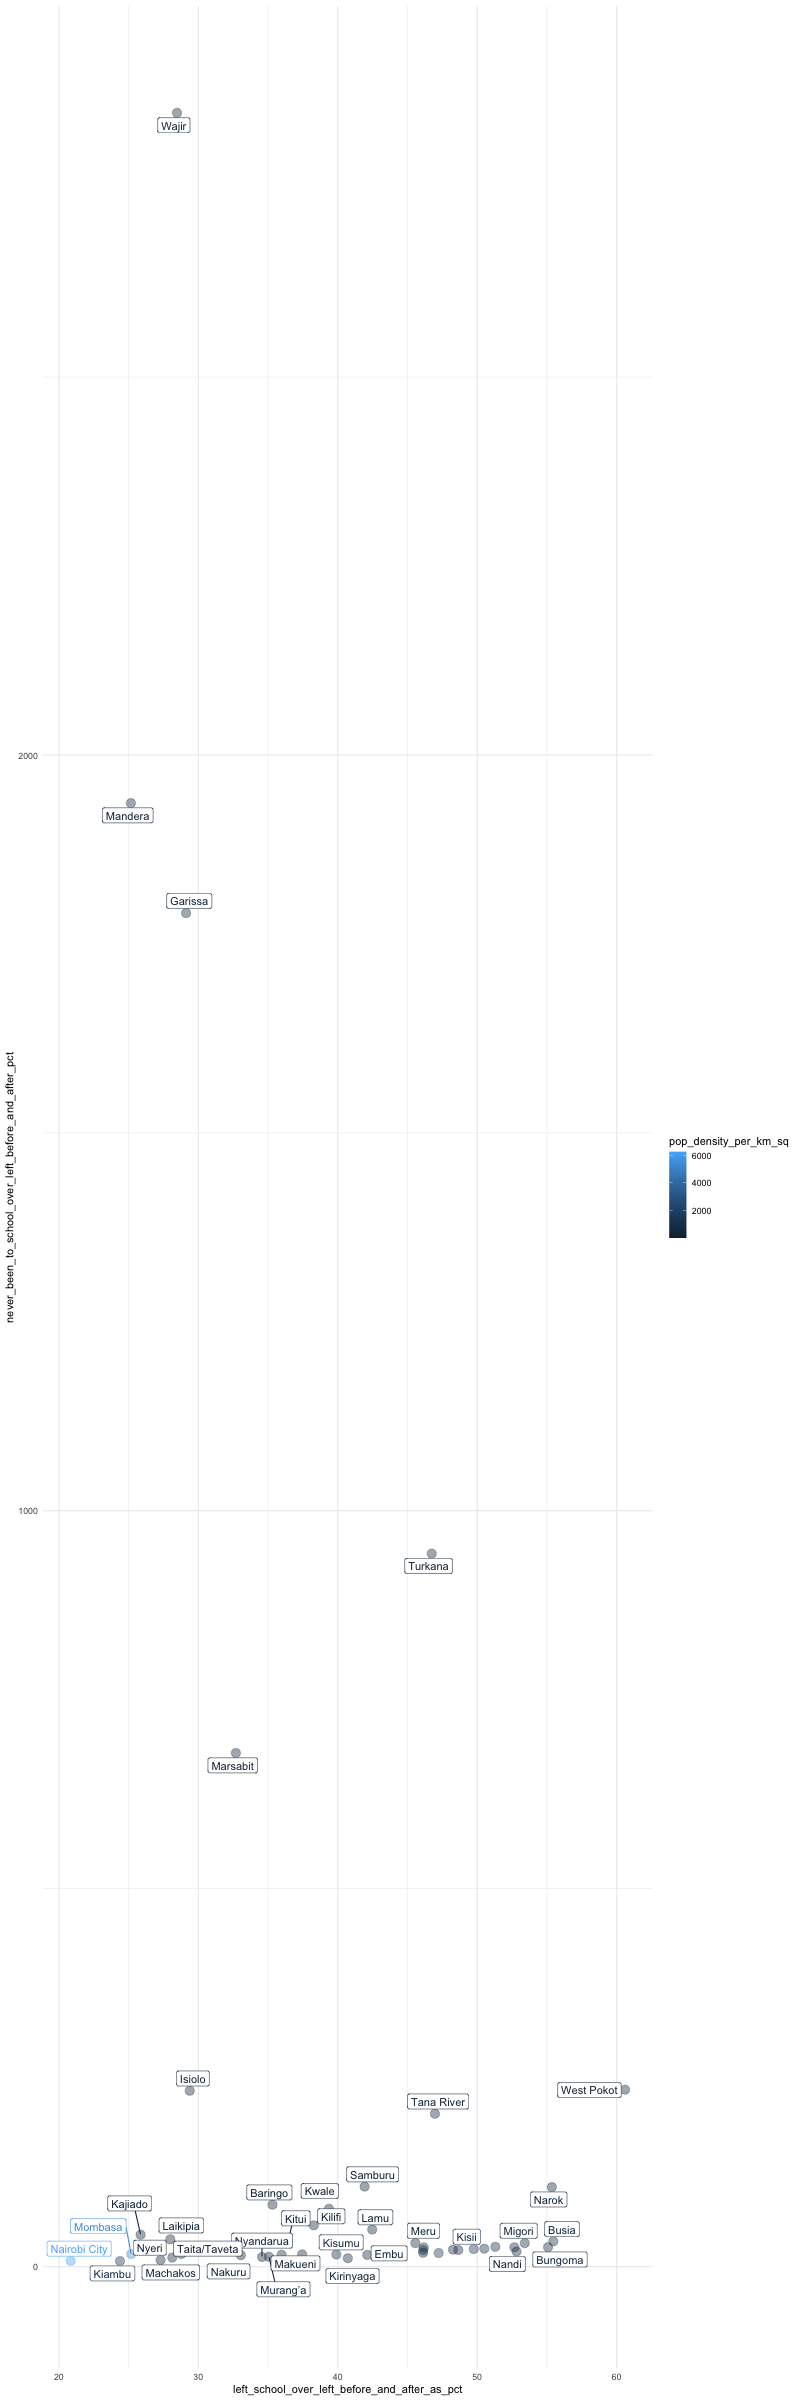

In [34]:
%%R -h 2400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=left_school_over_left_before_and_after_as_pct, y=never_been_to_school_over_left_before_and_after_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

# Important:
1) It does appear that counties with lower access to education by the population have lower dropout rates for those who have been to school

# Guide for regressions analysis

# So far, I have checked the following y variables:

1) Never been to school
2) Left school before completion
3) NASMLA scores

# So far, I have used revenue as the x variable
I need to change that: maybe there is a way to do that altogether. Some possible x variables could be:
1) Number of schools per area (how do I normalise by population?)
2) Average school size
3) Pupil Teacher ratio
4) Pupil textbook ratio
5) Electricity
6) Digital Devices


# Starting with Plotting then linear models then eventually multiple regressions

# Starting with checking Average School Size as x

### For those who have never been to school

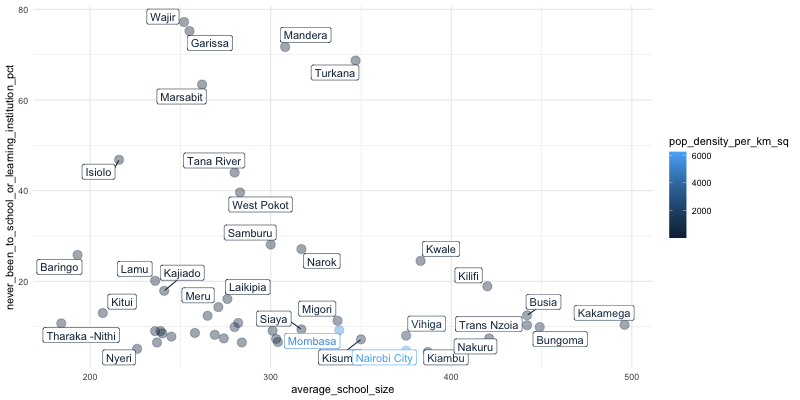

In [35]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=average_school_size, y=never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


### Not clear on what pattern is here, running by gender below shows roughly the same results too

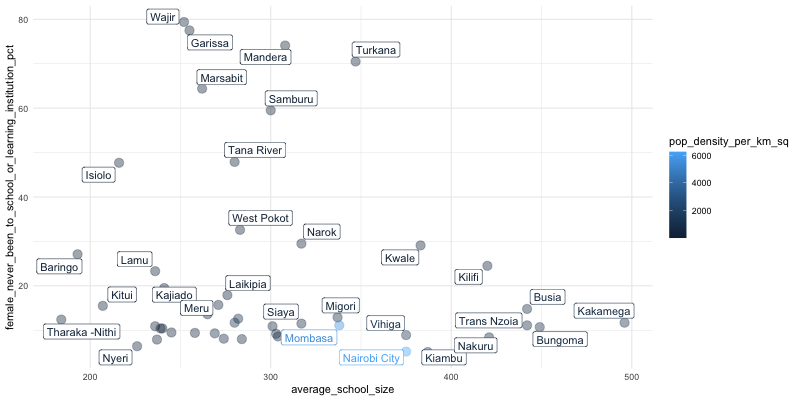

In [36]:
%%R -h 400 -w 800

#for people who have never been to school, to run by gender
ggplot(df_kenya_education_no_total_r) +
    aes(x=average_school_size, y=female_never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


Important
# What I found out:
    1) Kakamega has a high average school size
    2) Some counties eg Tharaka Nithi, Nyeri, should be looked into: they could possibly have high population densities but low school sizes, meaning either that they have many schools or high dropout rates
    
## Also note:
1) I thought the average school size may not bring out much of a pattern as much as pupil teacher ratio would? That is, a big school could have many teachers and still provide good education and a small school could have no teachers and provide poor education

# After average school size, check pupil teacher ratio as x:
1) against never been to school
2) against left school before completion
3) against NASMLA scores

# Pupil teacher ratio against never being to school

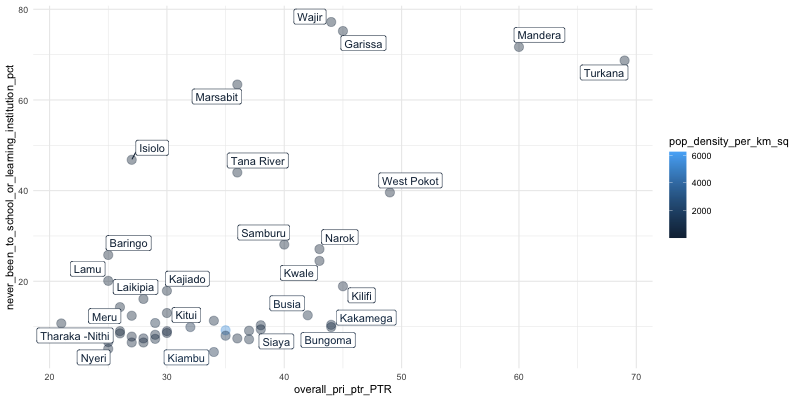

In [37]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=overall_pri_ptr_PTR, y=never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


#### Important:
1) Counties with the highest number of people who have never been to school have high pupil teacher ratio

# Pupil teacher ratio against leaving school before completion after starting school

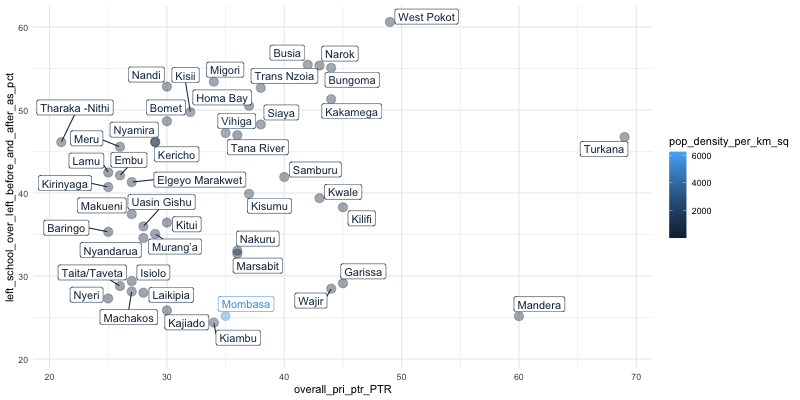

In [38]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=overall_pri_ptr_PTR, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


#### Important:
1) Not sure if there is a trend 

# Pupil teacher ratio against NASMLA scores

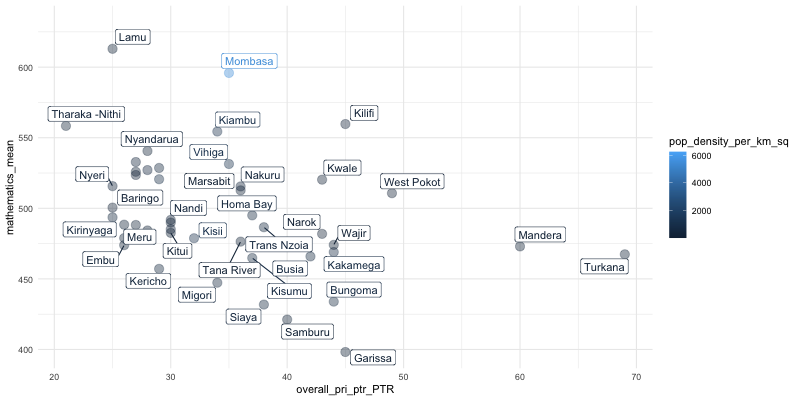

In [39]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=overall_pri_ptr_PTR, y=mathematics_mean, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

### Important:
    1) Not sure if I can make any conclusions for this

In [40]:
# Done with pupil teacher ratio

# Checking textbook ratio as x
Against access to school in the population:
not sure about the trend

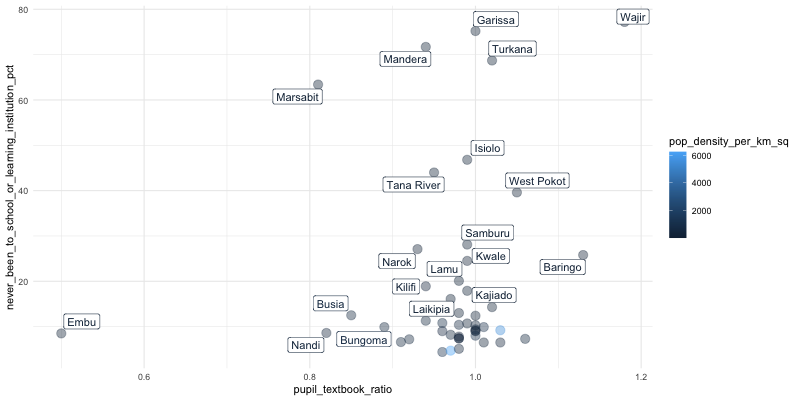

In [41]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=pupil_textbook_ratio, y=never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


2) Against dropout rates: not sure what the trend is

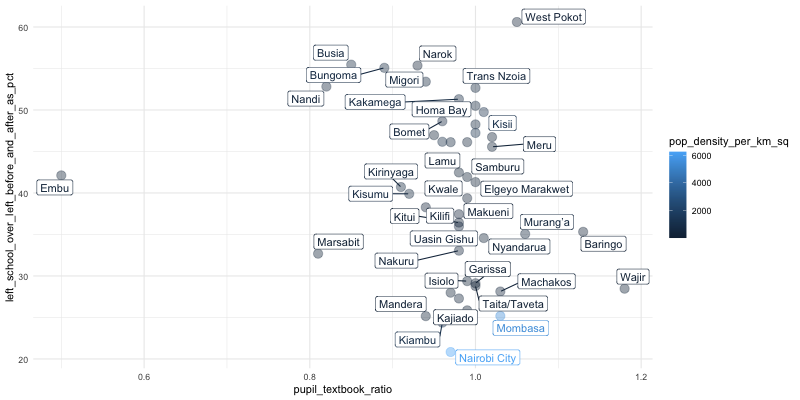

In [42]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=pupil_textbook_ratio, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


3) Against NASMLA score for math: not sure if there is a trend

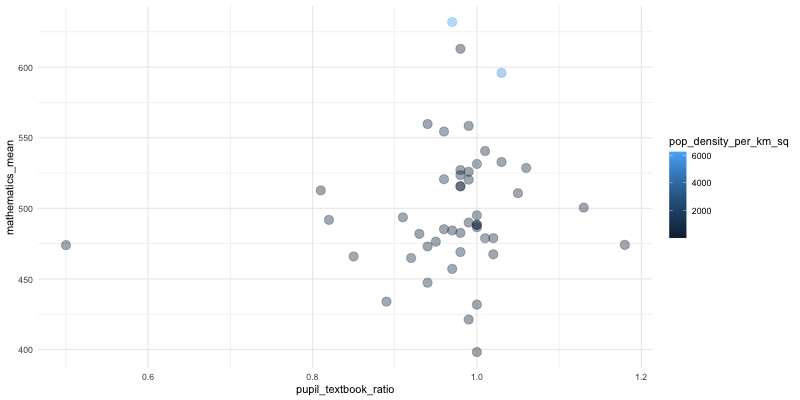

In [43]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=pupil_textbook_ratio, y=mathematics_mean, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
#     geom_label_repel()+
    theme_minimal()


Important:
    
1) Not sure if textbook has an impact on the y's I have selected

# Checking electricity as the x now
1) First, I added columns for pct with power and with no power

Important:
1) Counties with no electricity are more likely to have the highest number of people who have never been to school

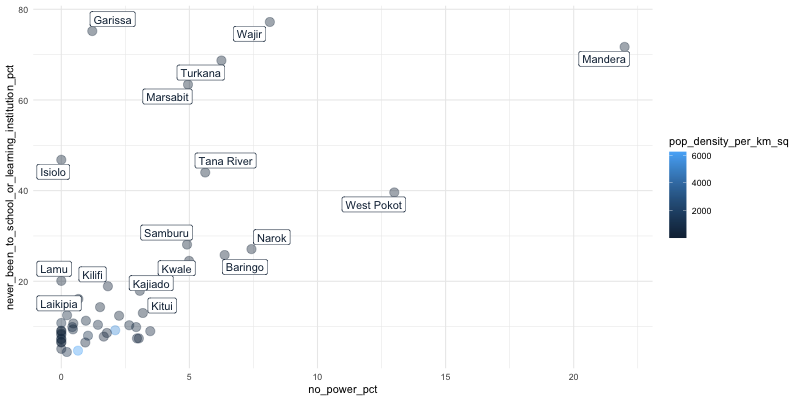

In [44]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=no_power_pct, y=never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


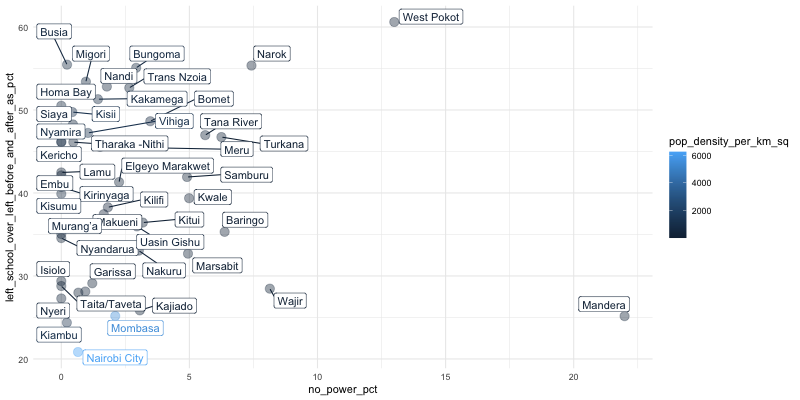

In [45]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=no_power_pct, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

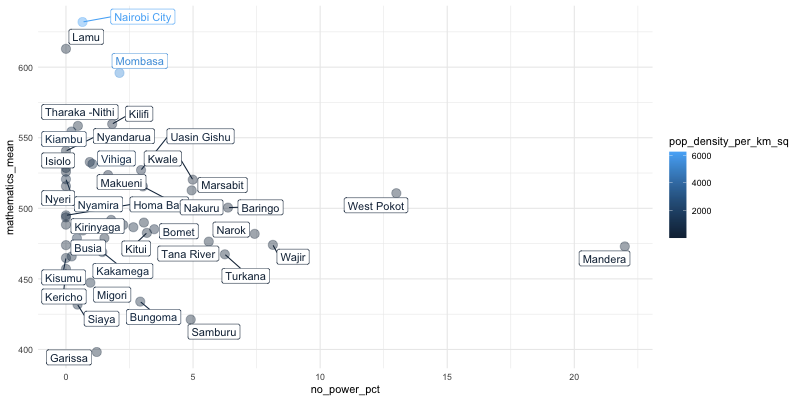

In [46]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=no_power_pct, y=mathematics_mean, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


# Finally checking devices as the x
1) I am not very confident about these numbers, since majority are at 99% and above?
2) Also not confident about resulting trends, just noting the counties with low access to devices: Samburu, Isiolo, Marsabit, Garissa


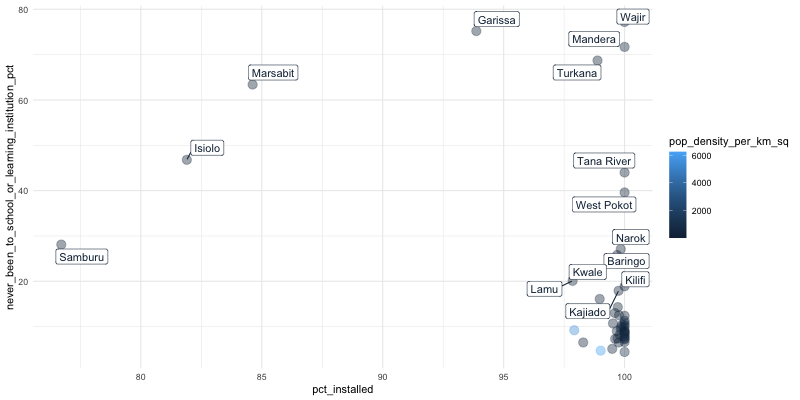

In [47]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=pct_installed, y=never_been_to_school_or_learning_institution_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()


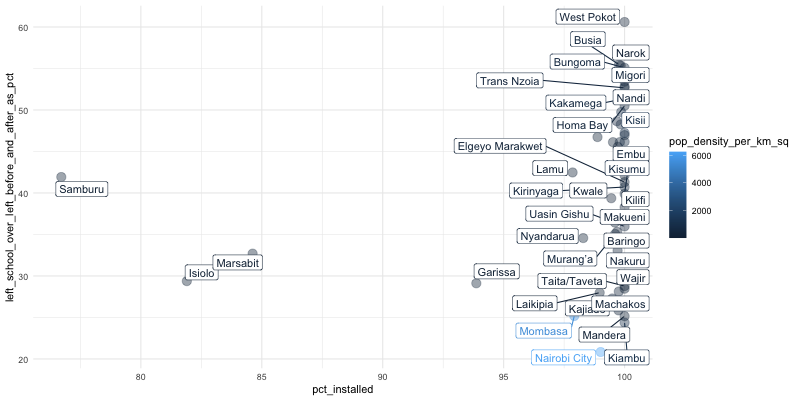

In [48]:
%%R -h 400 -w 800

ggplot(df_kenya_education_no_total_r) +
    aes(x=pct_installed, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

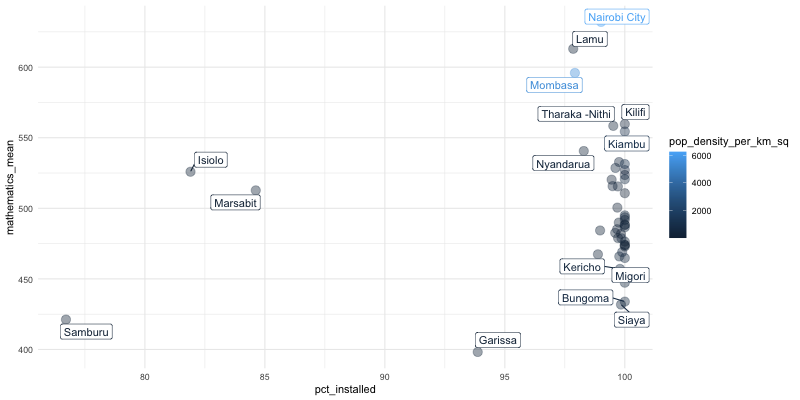

In [49]:
%%R -h 400 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=pct_installed, y=mathematics_mean, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

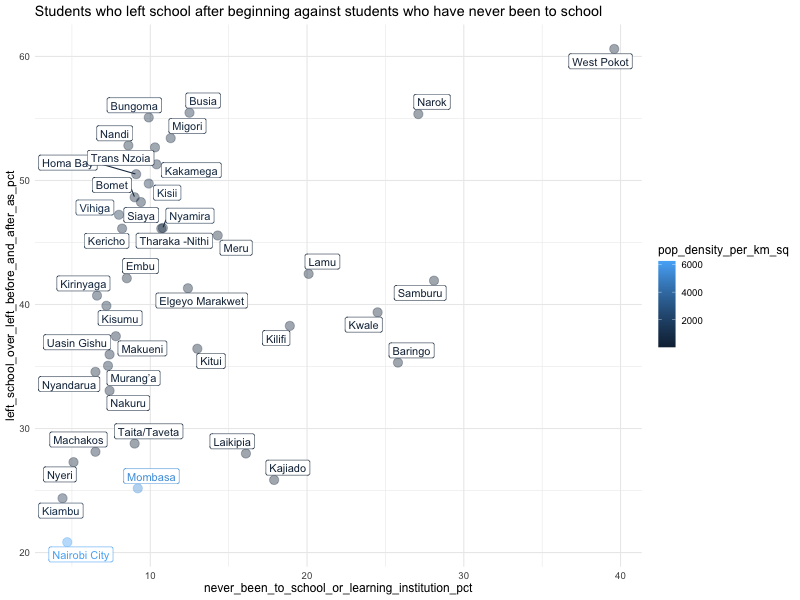

In [50]:
%%R -h 600 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r %>% filter(never_been_to_school_or_learning_institution_pct<40)) +
    aes(x=never_been_to_school_or_learning_institution_pct, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()+
    labs(
        title='Students who left school after beginning against students who have never been to school',
        )+
    theme(text=element_text(size=12))
#     ylab("Percentage of students who left school before completing") +
#     xlab("Percentage of people who were never went to school normalised over those who did attend school") 

In [51]:
# Linear regression 

In [52]:
%%R 
# guide for linear regression
model <- lm(left_school_over_left_before_and_after_as_pct ~ never_been_to_school_or_learning_institution_pct, df_kenya_education_no_total_r %>% filter(never_been_to_school_or_learning_institution_pct<40))
summary(model)


Call:
lm(formula = left_school_over_left_before_and_after_as_pct ~ 
    never_been_to_school_or_learning_institution_pct, data = df_kenya_education_no_total_r %>% 
    filter(never_been_to_school_or_learning_institution_pct < 
        40))

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6664  -6.2774   0.4829   8.0554  14.9175 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                       36.0062     2.9883  12.049
never_been_to_school_or_learning_institution_pct   0.4198     0.2072   2.026
                                                 Pr(>|t|)    
(Intercept)                                      1.51e-14 ***
never_been_to_school_or_learning_institution_pct   0.0498 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.784 on 38 degrees of freedom
Multiple R-squared:  0.09748,	Adjusted R-squared:  0.07373 
F-statistic: 4.104 on 1 and 38 DF,  p-v

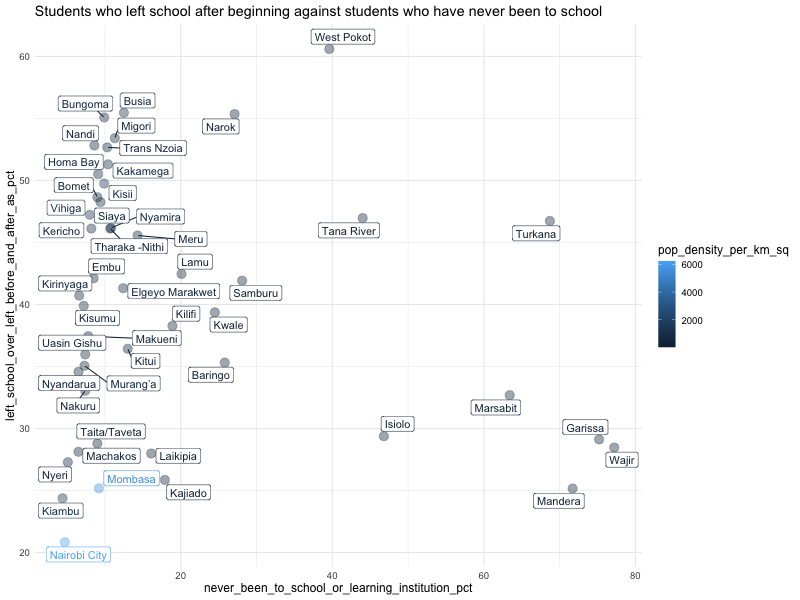

In [53]:
%%R -h 600 -w 800

#for overall people who have never been to school
ggplot(df_kenya_education_no_total_r) +
    aes(x=never_been_to_school_or_learning_institution_pct, y=left_school_over_left_before_and_after_as_pct, label = County, color=pop_density_per_km_sq) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()+
    labs(
        title='Students who left school after beginning against students who have never been to school',
        )+
    theme(text=element_text(size=12))
#     ylab("Percentage of students who left school before completing") +
#     xlab("Percentage of people who were never went to school normalised over those who did attend school") 